1.1

In [14]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import spicy
import math 

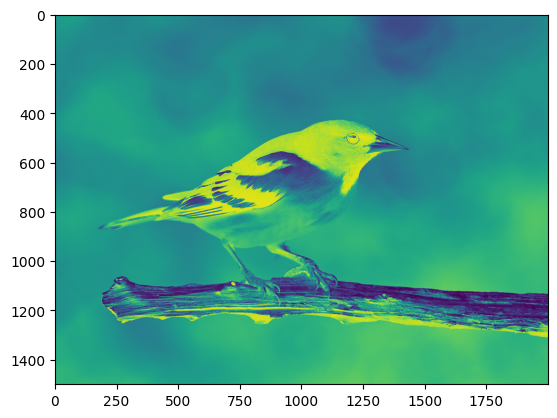

In [15]:
img = Image.open("bird.png").convert("L")
im_1 = np.asarray(img)
im_2 = 255 - im_1
new_img = Image.fromarray(im_2)
img.show()
plt.imshow(new_img)
plt.show()

1.2

C:\Users\truc1\AppData\Local\Temp\ipykernel_6760\2216132296.py:13: RuntimeWarning: divide by zero encountered in log
  b2 = np.log(b3) * gamma


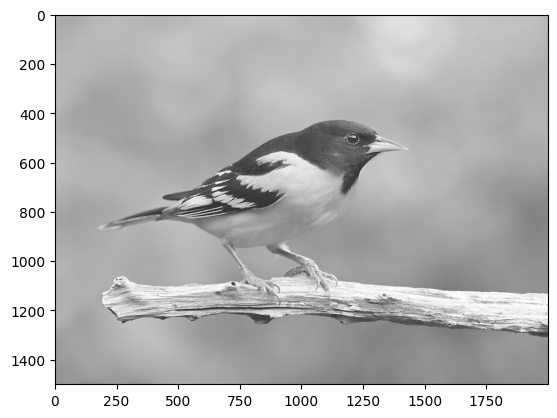

In [16]:
img = Image.open("bird.png").convert("L")

im_1 = np.asarray(img)

gamma = 0.5

b1 = im_1.astype(float) 

b2 = np.max(b1)

b3 = b1/b2

b2 = np.log(b3) * gamma

c = np.exp(b2) * 255

c1 = c.astype(int)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d)
plt.show()

1.3

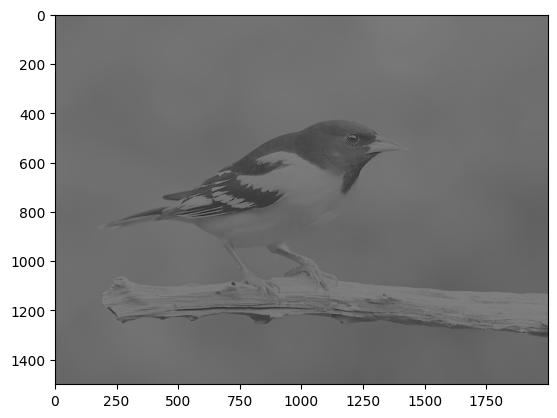

In [17]:
img = Image.open("bird.png").convert("L")
im_1 = np.asarray(img)
b1 = im_1.astype(float)
b2 = np.max(b1)
c = (128.0 * np.log(b1 + 1)) / np.log(1+b2) 

c1 = c.astype(int)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d, cmap='gray')
plt.show()

1.4

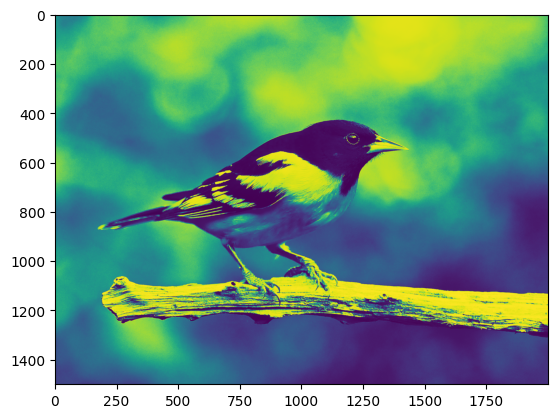

In [18]:
img = Image.open("bird.png").convert("L")
im1 = np.asarray(img)
b1 = im1.flatten()
hist, bins = np.histogram(im1, bins=256, range=(0, 255))
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf.max() - cdf_m.min())
cdf = num_cdf_m / den_cdf_m
cdf = np.ma.filled(cdf, 0).astype('uint8')
im2 = cdf[b1]
im3 = np.reshape(im2, im1.shape)
im4 = Image.fromarray(im3)
img.show()
im4.show()
plt.imshow(im4)
plt.show()

1.5

Max: 0 Min: 255


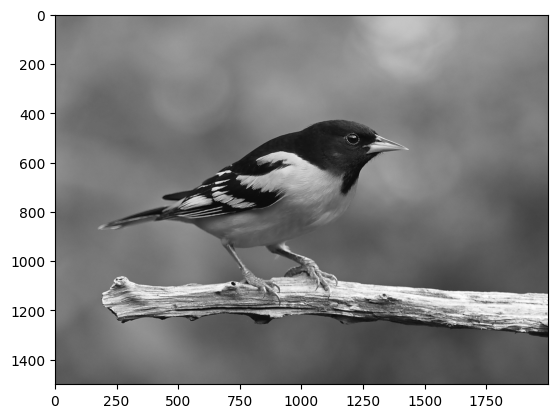

In [19]:
img = Image.open("bird.png").convert("L")
im1 = np.asarray(img)
b = im1.max()
a = im1.min()
print("Max:", a, "Min:", b)
c = im1.astype(float)
im2 = 255* (c - a) / (b - a)
im3 = Image.fromarray(im2)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

1.6.1

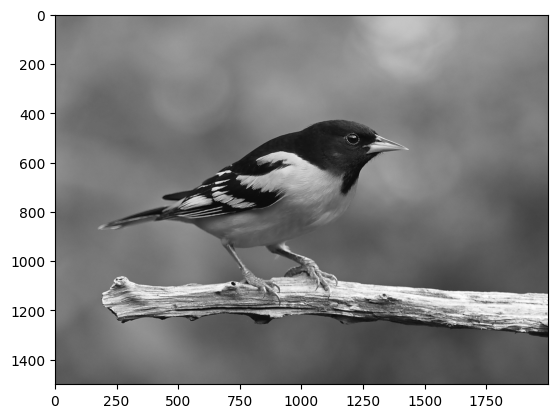

In [20]:
img = Image.open("bird.png").convert("L")
im1 = np.asarray(img)
c = abs(spicy.fftpack.fft2(im1))
d = spicy.fftpack.fftshift(c)
d = d.astype(float)

img = Image.fromarray(d)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

1.6.2

Butterworth Lowpass Filter

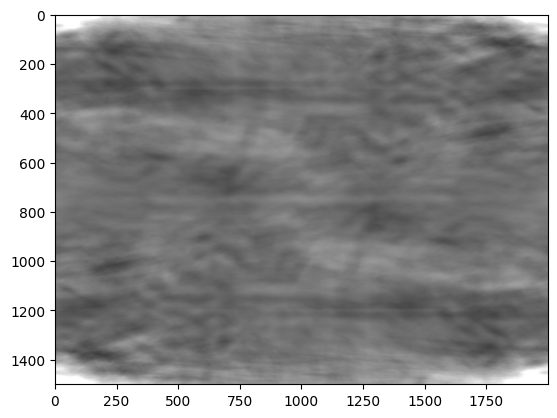

In [21]:
img = Image.open("bird.png").convert("L")
im1 = np.asarray(img)
c = abs(spicy.fftpack.fft2(im1))
d = spicy.fftpack.fftshift(c)
M = d.shape[0]
N = d.shape[1]
H = np.ones((M, N))

center1 = M/2
center2 = N/2
d_0 = 30.0
t1 = 1
t2 = 2*t1

for i in range(1,M):
    for j in range(1,N):
        r1 = (i - center1)**2 + (j - center2)**2
        r = math.sqrt(r1)
        
        if r>d_0:
            H[i,j] = 1/(1+ (r/d_0)**t1)
            
H = H.astype(float)
H = Image.fromarray(H)
con = d*H
e = abs(spicy.fftpack.ifft2(con))
e = e.astype(float)
im3 = Image.fromarray(e)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

Butterworth highpass Filter

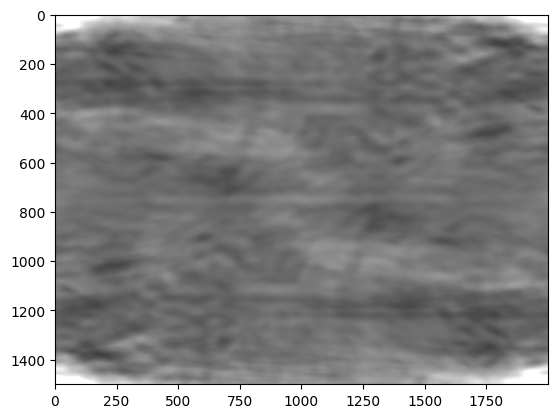

In [22]:
img = Image.open("bird.png").convert("L")
im1 = np.asarray(img)
c = abs(spicy.fftpack.fft2(im1))
d = spicy.fftpack.fftshift(c)
M = d.shape[0]
N = d.shape[1]
H = np.ones((M, N))

center1 = M/2
center2 = N/2
d_0 = 30.0
t1 = 1
t2 = 2*t1

for i in range(1,M):
    for j in range(1,N):
        r1 = (i - center1)**2 + (j - center2)**2
        r = math.sqrt(r1)
        
        if r>d_0:
            H[i,j] = 1/(1+ (r/d_0)**t2)
            
H = H.astype(float)
H = Image.fromarray(H)
con = d*H
e = abs(spicy.fftpack.ifft2(con))
e = e.astype(float)
im3 = Image.fromarray(e)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

Bài 1

Image inverse transformation - I
Gamma correction - G
Log transformation - L
Histogram equalization - H
Contrast stretching - C
Thoát - E
Gamma Correction


C:\Users\truc1\AppData\Local\Temp\ipykernel_6760\2265747217.py:28: RuntimeWarning: divide by zero encountered in log
  b2 = np.log(b3) *gamma


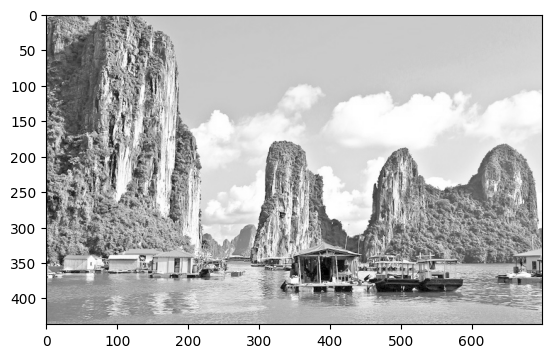

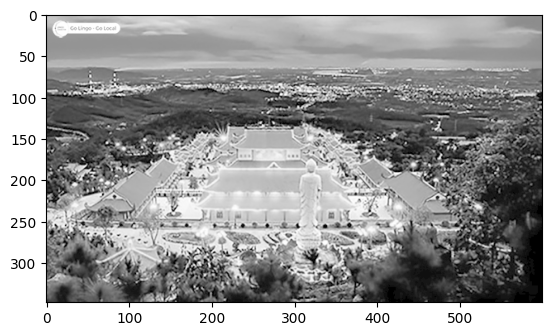

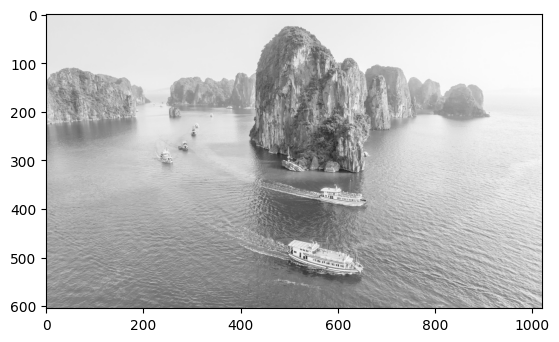

In [23]:
list_images = ["exercise/ha-long-bay-in-vietnam.jpg","exercise/pagoda.jpg","exercise/quang_ninh.jpg",]

def Bt1(list):
    input_choice = input("Nhập chương trình muốn thực hiện: ").strip().lower()
    if input_choice == "i":
        count = 0
        print("Inverse Image Transformation")
        for i in list:
            count += 1
            img = Image.open(i).convert("L")
            im_1 = np.asarray(img)
            im_2 = 255 - im_1
            new_img = Image.fromarray(im_2)
            plt.imshow(new_img)
            plt.show()
            iio.imsave("Image_inverse_transformed_" + str(count) + ".jpg", new_img)
    elif input_choice == "g":
        count = 0
        print("Gamma Correction")
        for i in list:
            count +=1
            img = Image.open(i).convert("L")
            im_1 = np.asarray(img)
            gamma = 0.5
            b1 = im_1.astype(float) 
            b2 = np.max(b1)
            b3 = b1/b2
            b2 = np.log(b3) *gamma
            c = np.exp(b2) * 255
            c1 = c.astype(int)
            d = Image.fromarray(c1)
            plt.imshow(d)
            plt.show()
            iio.imsave("gamma_corrected_" + str(count) + ".png", d)
    elif input_choice == "l":
        count = 0
        print("Log Transformation")
        for i in list:
            count +=1
            img = Image.open(i).convert("L")
            im_1 = np.asarray(img)
            b1 = im_1.astype(float)
            b2 = np.max(b1)
            c = (128.0 * np.log(b1 + 1)) / np.log(1+b2) 
            c1 = c.astype(int)
            d = Image.fromarray(c1)
            plt.imshow(d, cmap='gray')
            plt.show()
            iio.imsave("log_transformed_" + str(count) + ".png", d)
    elif input_choice == "h":
        count = 0
        print("Histogram Equalization")
        for i in list:
            count +=1
            img = Image.open(i).convert("L")
            im1 = np.asarray(img)
            b1 = im1.flatten()
            hist, bins = np.histogram(im1, bins=256, range=(0, 255))
            cdf = hist.cumsum()
            cdf_m = np.ma.masked_equal(cdf, 0)
            num_cdf_m = (cdf_m - cdf_m.min())*255
            den_cdf_m = (cdf.max() - cdf_m.min())
            cdf = num_cdf_m / den_cdf_m
            cdf = np.ma.filled(cdf, 0).astype('uint8')
            im2 = cdf[b1]
            im3 = np.reshape(im2, im1.shape)
            im4 = Image.fromarray(im3)
            plt.imshow(im4)
            plt.show()
            iio.imsave("histogram_equalized_" + str(count) + ".png", im4)
    elif input_choice == "c":
        count = 0
        print("Contrast Stretching")
        for i in list:
            count +=1
            img = Image.open(i).convert("L")
            im1 = np.asarray(img)
            b = im1.max()
            a = im1.min()
            print("Max:", a, "Min:", b)
            c = im1.astype(float)
            im2 = 255* (c - a) / (b - a)
            im2 = im2.astype(np.uint8)
            im3 = Image.fromarray(im2)
            plt.imshow(im3)
            plt.show()
            iio.imsave("contrast_stretched_" + str(count) + ".png", im3)
    elif input_choice == "e":
        print("Thoát chương trình")
    else:
        print("Lựa chọn không hợp lệ, vui lòng thử lại.")
        
print("Image inverse transformation - I")
print("Gamma correction - G")
print("Log transformation - L")
print("Histogram equalization - H")
print("Contrast stretching - C")
print("Thoát - E")

Bt1(list_images)